In [1]:
# Step 2: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display plots in notebook
%matplotlib inline

# Set random seed for reproducibility
np.random.seed(42)

In [2]:
# Step 3: Define restaurant names

restaurants = [
    "Zouk Tea Bar & Grill",
    "Delhi House Cafe"
]

restaurants

['Zouk Tea Bar & Grill', 'Delhi House Cafe']

In [3]:
# Step 4: Customer demographic categories

age_groups = ["18-24", "25-34", "35-44", "45-54", "55+"]
genders = ["Male", "Female"]
income_levels = ["Low", "Middle", "High"]

age_groups, genders, income_levels

(['18-24', '25-34', '35-44', '45-54', '55+'],
 ['Male', 'Female'],
 ['Low', 'Middle', 'High'])

In [4]:
# Step 5: Generate dataset

num_records = 1000

data = {
    "Restaurant": np.random.choice(restaurants, num_records),
    
    "Age Group": np.random.choice(age_groups, num_records),
    
    "Gender": np.random.choice(genders, num_records),
    
    "Income Level": np.random.choice(income_levels, num_records),
    
    "Monthly Sales (£)": np.random.randint(2000, 15000, num_records),
    
    "Monthly Cost (£)": np.random.randint(1000, 9000, num_records),
    
    "Customer Count": np.random.randint(50, 500, num_records)
}

df = pd.DataFrame(data)

df.head()

,Restaurant,Age Group,Gender,Income Level,Monthly Sales (£),Monthly Cost (£),Customer Count
0,Zouk Tea Bar & Grill,18-24,Female,Low,3140,5713,461
1,Delhi House Cafe,18-24,Male,Low,10458,8071,180
2,Zouk Tea Bar & Grill,18-24,Female,High,12037,8967,286
3,Zouk Tea Bar & Grill,55+,Female,High,3708,7405,295
4,Zouk Tea Bar & Grill,45-54,Male,Low,5630,1175,275


In [5]:
# Step 6: Calculate profit and profit margin

df["Profit (£)"] = df["Monthly Sales (£)"] - df["Monthly Cost (£)"]

df["Profit Margin (%)"] = (df["Profit (£)"] / df["Monthly Sales (£)"]) * 100

df.head()

,Restaurant,Age Group,Gender,Income Level,Monthly Sales (£),Monthly Cost (£),Customer Count,Profit (£),Profit Margin (%)
0,Zouk Tea Bar & Grill,18-24,Female,Low,3140,5713,461,-2573,-81.942675
1,Delhi House Cafe,18-24,Male,Low,10458,8071,180,2387,22.824632
2,Zouk Tea Bar & Grill,18-24,Female,High,12037,8967,286,3070,25.504694
3,Zouk Tea Bar & Grill,55+,Female,High,3708,7405,295,-3697,-99.703344
4,Zouk Tea Bar & Grill,45-54,Male,Low,5630,1175,275,4455,79.129663


In [6]:
# Step 7: Dataset overview

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant         1000 non-null   object 
 1   Age Group          1000 non-null   object 
 2   Gender             1000 non-null   object 
 3   Income Level       1000 non-null   object 
 4   Monthly Sales (£)  1000 non-null   int64  
 5   Monthly Cost (£)   1000 non-null   int64  
 6   Customer Count     1000 non-null   int64  
 7   Profit (£)         1000 non-null   int64  
 8   Profit Margin (%)  1000 non-null   float64
dtypes: float64(1), int64(4), object(4)
memory usage: 70.4+ KB


In [7]:
# Summary statistics
df.describe()

,Monthly Sales (£),Monthly Cost (£),Customer Count,Profit (£),Profit Margin (%)
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,8656.095000,4979.077000,284.884000,3677.018000,26.138406
std,3759.814785,2271.801059,127.881336,4318.167586,57.271362
min,2018.000000,1002.000000,50.000000,-6021.000000,-295.059289
25%,5417.000000,3155.250000,177.750000,393.250000,7.563581
50%,8551.000000,4856.000000,288.000000,3665.000000,41.561667
75%,12073.000000,6951.500000,397.250000,6852.500000,64.619271
max,14996.000000,8972.000000,499.000000,13797.000000,92.790369


In [8]:
# Step 8: Save dataset

df.to_csv("restaurant_sales_dataset.csv", index=False)

print("Dataset saved successfully.")

Dataset saved successfully.


In [9]:
# Step 9: Average sales per restaurant

sales_by_restaurant = df.groupby("Restaurant")["Monthly Sales (£)"].mean()

sales_by_restaurant

Restaurant
Delhi House Cafe        8722.200000
Zouk Tea Bar & Grill    8587.291837
Name: Monthly Sales (£), dtype: float64

In [10]:
# Step 10: Profit margin analysis

profit_margin = df.groupby("Restaurant")["Profit Margin (%)"].mean()

profit_margin

Restaurant
Delhi House Cafe        26.205801
Zouk Tea Bar & Grill    26.068260
Name: Profit Margin (%), dtype: float64

In [11]:
# Step 11: Demographics analysis

demographics = df.groupby(
    ["Restaurant", "Age Group"]
)["Customer Count"].sum()

demographics

Restaurant            Age Group
Delhi House Cafe      18-24        31667
                      25-34        26612
                      35-44        31610
                      45-54        23589
                      55+          32037
Zouk Tea Bar & Grill  18-24        29703
                      25-34        27422
                      35-44        27102
                      45-54        25958
                      55+          29184
Name: Customer Count, dtype: int64

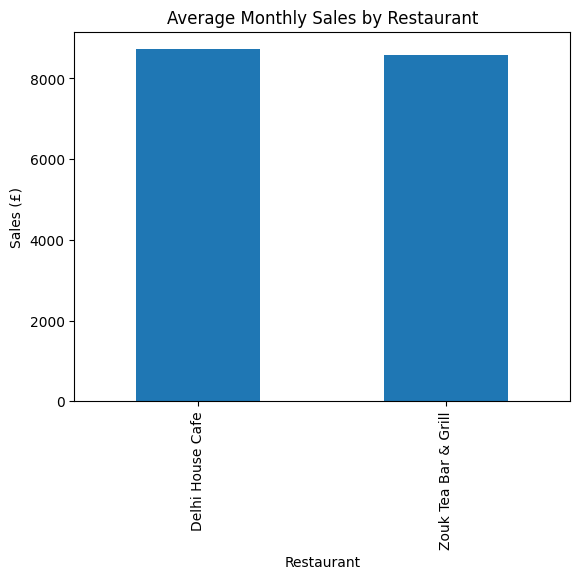

In [12]:
# Step 12: Plot sales

plt.figure()
df.groupby("Restaurant")["Monthly Sales (£)"].mean().plot(kind="bar")

plt.title("Average Monthly Sales by Restaurant")
plt.ylabel("Sales (£)")
plt.xlabel("Restaurant")

plt.show()

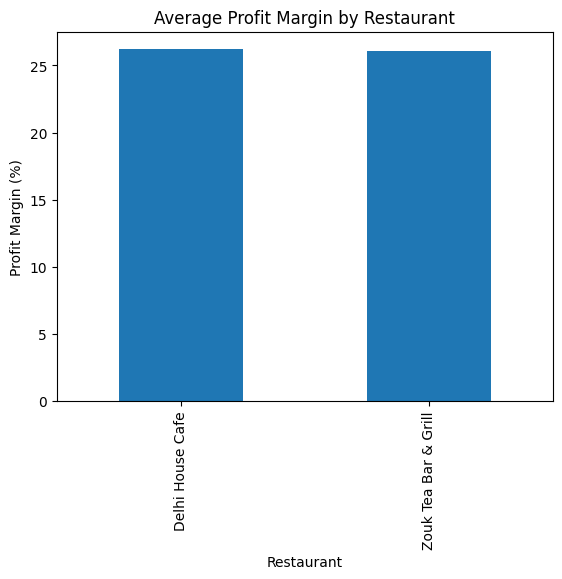

In [13]:
# Step 13: Profit margin plot

plt.figure()

df.groupby("Restaurant")["Profit Margin (%)"].mean().plot(kind="bar")

plt.title("Average Profit Margin by Restaurant")
plt.ylabel("Profit Margin (%)")
plt.xlabel("Restaurant")

plt.show()

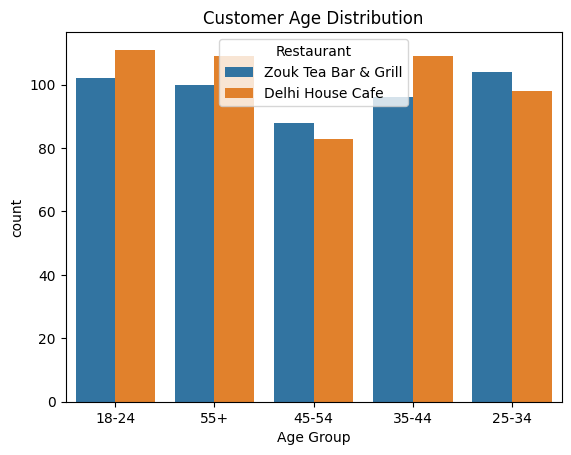

In [14]:
# Step 14: Age group distribution

plt.figure()

sns.countplot(data=df, x="Age Group", hue="Restaurant")

plt.title("Customer Age Distribution")
plt.show()

In [15]:
# Step 15: View final dataset

df.head(20)

,Restaurant,Age Group,Gender,Income Level,Monthly Sales (£),Monthly Cost (£),Customer Count,Profit (£),Profit Margin (%)
0,Zouk Tea Bar & Grill,18-24,Female,Low,3140,5713,461,-2573,-81.942675
1,Delhi House Cafe,18-24,Male,Low,10458,8071,180,2387,22.824632
2,Zouk Tea Bar & Grill,18-24,Female,High,12037,8967,286,3070,25.504694
3,Zouk Tea Bar & Grill,55+,Female,High,3708,7405,295,-3697,-99.703344
4,Zouk Tea Bar & Grill,45-54,Male,Low,5630,1175,275,4455,79.129663
5,Delhi House Cafe,55+,Female,Low,5211,6285,257,-1074,-20.610248
6,Zouk Tea Bar & Grill,45-54,Male,High,12485,3704,455,8781,70.332399
7,Zouk Tea Bar & Grill,55+,Female,High,13924,5937,145,7987,57.361390
8,Zouk Tea Bar & Grill,55+,Male,Low,14021,1369,471,12652,90.236074
9,Delhi House Cafe,35-44,Male,Low,8538,2818,249,5720,66.994612
